In [1]:
from matplotlib import dates
dates.set_epoch('1800-01-01')

import xarray as xr
import numpy as np
import pandas as pd

In [2]:
ds = xr.open_dataset('ERA5.features.1950-2019.nc')
ds.close()
ds

<xarray.Dataset>
Dimensions:  (lon: 361, lat: 361, time: 840)
Coordinates:
  * lon      (lon) float32 -90.0 -89.75 -89.5 -89.25 ... -0.75 -0.5 -0.25 0.0
  * lat      (lat) float32 0.0 -0.25 -0.5 -0.75 ... -89.25 -89.5 -89.75 -90.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2019-12-01
Data variables:
    r        (time, lat, lon) float32 ...
    z        (time, lat, lon) float32 ...
    cape     (time, lat, lon) float32 ...
    cin      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-25 03:52:56 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

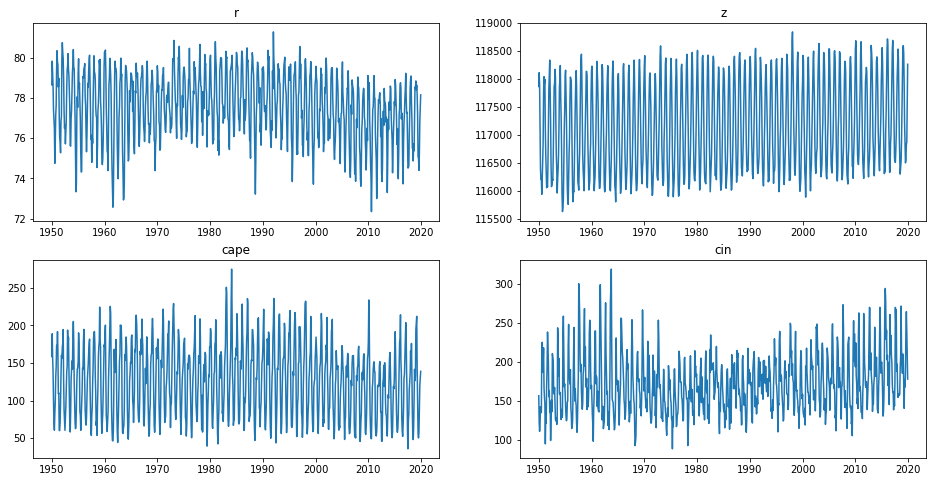

In [29]:
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
climatology = ds.mean(dim='time').to_array()
climatology.sortby('lat','lon')
sqrt_cos_lat_weights = np.abs(np.cos(np.deg2rad(ds.lat)))
mean_timeseries = ds.weighted(sqrt_cos_lat_weights).mean(dim=['lat','lon']).to_array()
# fig = climatology.plot(x='lon',y='lat',transform=ccrs.PlateCarree(),vmax=250,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# fig = climatology.plot(x='lon',y='lat',col='variable',col_wrap=2,transform=ccrs.PlateCarree(),vmax=1000,subplot_kws={'projection':ccrs.Orthographic(central_longitude=-60,central_latitude=-15)})
# for p in fig.axes.flatten():
#     p.coastlines()
fig,axs = plt.subplots(2,2,figsize=(16,8))
for v,ax in zip(mean_timeseries,axs.flatten()):
    ax.plot(v.time,v.values)
    ax.set_title(v['variable'].values)